<a href="https://colab.research.google.com/github/BraccioCodes/loan-preapproval-ml/blob/main/LOAN_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import current necessary libraries (do more as we go)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# Upload dataset

uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset (2).csv


In [ ]:
# Dataset overview

df= pd.read_csv("/content/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

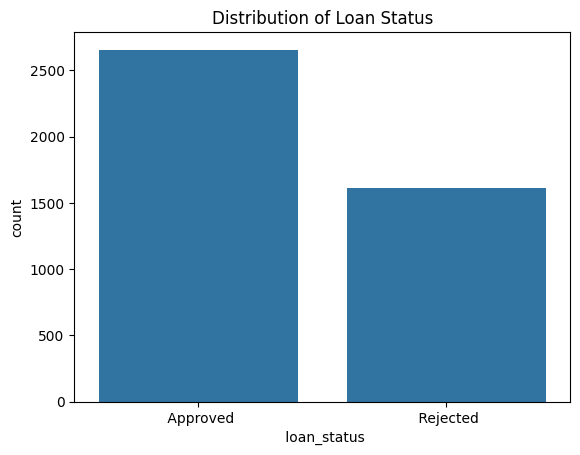

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [ ]:
# Plot graph to visualize class balance

sns.countplot(x=' loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()
print(df[' loan_status'].value_counts())

In [ ]:
# Search for null values

null_values = df.isnull().sum()
print(null_values)

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [ ]:
# Find outliers using IQR method

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Return the percentage of outliers
    percent_outliers = (len(outliers) / len(data)) * 100
    print(f"\nPercentage of outliers in {column}: {percent_outliers:.2f}%")

    return None

In [ ]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [ ]:
print(find_outliers_iqr(df, ' income_annum'))
print(find_outliers_iqr(df, ' loan_amount'))
print(find_outliers_iqr(df, ' residential_assets_value'))
print(find_outliers_iqr(df, ' commercial_assets_value'))
print(find_outliers_iqr(df, ' luxury_assets_value'))
print(find_outliers_iqr(df, ' bank_asset_value'))


Percentage of outliers in  income_annum: 0.00%
None

Percentage of outliers in  loan_amount: 0.00%
None

Percentage of outliers in  residential_assets_value: 1.22%
None

Percentage of outliers in  commercial_assets_value: 0.87%
None

Percentage of outliers in  luxury_assets_value: 0.00%
None

Percentage of outliers in  bank_asset_value: 0.12%
None


In [ ]:
# More EDA

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
# Encode categorical variables

df_encoded = df.copy()

education_mapping = {' Graduate': 1, ' Not Graduate': 0}
self_employed_mapping = {' Yes': 1, ' No': 0}
loan_status_mapping = {' Approved': 1, ' Rejected': 0}

df_encoded[' education'] = df_encoded[' education'].map(education_mapping)
df_encoded[' self_employed'] = df_encoded[' self_employed'].map(self_employed_mapping)
df_encoded[' loan_status'] = df_encoded[' loan_status'].map(loan_status_mapping)

In [ ]:
# Scale numerical columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = [' loan_term', ' cibil_score', ' income_annum', ' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

df_scaled = df_encoded[num_cols].copy()

scaled_values = scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(scaled_values, index=df_encoded.index, columns=num_cols)
df_scaled[' education'] = df_encoded[' education'].astype(int)
df_scaled[' self_employed'] = df_encoded[' self_employed'].astype(int)
df_scaled[' loan_status'] = df_encoded[' loan_status'].astype(int)

df_scaled.describe()

,loan_term,cibil_score,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
count,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000
mean,-9.736882e-17,2.629790e-16,1.681069e-16,7.323467e-17,3.828176e-17,-1.664424e-18,-5.908706e-17,4.993273e-17,0.502225,0.503631,0.622160
std,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,0.500054,0.500045,0.484904
min,-1.559151e+00,-1.739665e+00,-1.731375e+00,-1.640450e+00,-1.164503e+00,-1.133237e+00,-1.628783e+00,-1.531382e+00,0.000000,0.000000,0.000000
25%,-8.584443e-01,-8.522468e-01,-8.405896e-01,-8.220748e-01,-8.108132e-01,-8.370048e-01,-8.378082e-01,-8.236472e-01,0.000000,0.000000,0.000000
50%,-1.577371e-01,3.709143e-04,1.456473e-02,-7.005410e-02,-2.879675e-01,-2.901149e-01,-5.781874e-02,-1.159123e-01,1.000000,1.000000,1.000000
75%,8.933237e-01,8.587888e-01,8.697190e-01,7.040849e-01,5.885679e-01,5.985812e-01,7.221707e-01,6.533647e-01,1.000000,1.000000,1.000000
max,1.594031e+00,1.740407e+00,1.724873e+00,2.694728e+00,3.325819e+00,3.287456e+00,2.644680e+00,2.991967e+00,1.000000,1.000000,1.000000


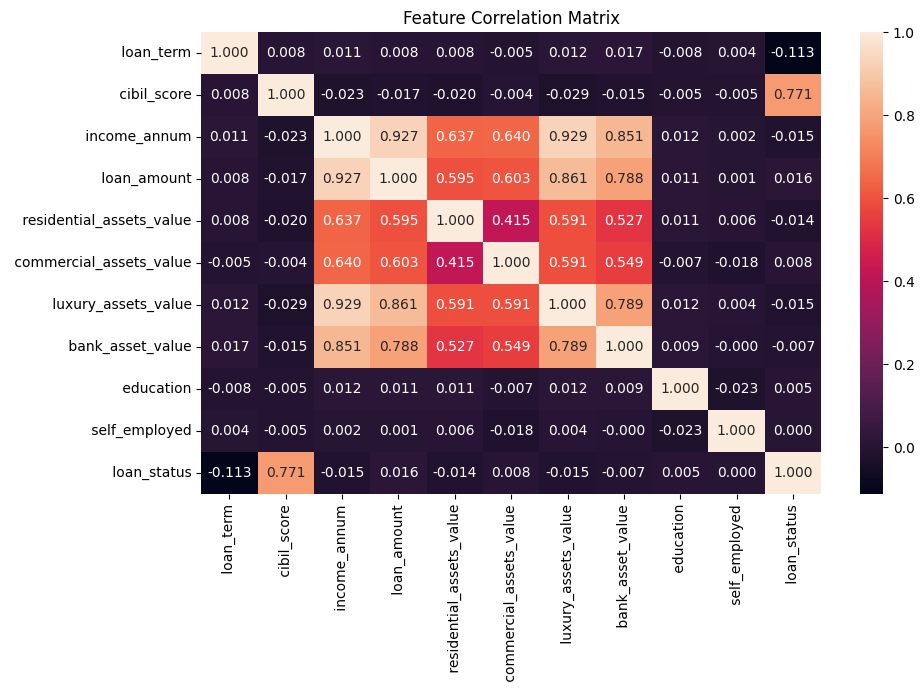

In [ ]:
# Plot correlation matrix for feature selection

plt.figure(figsize=(10, 6))
num_cols_status = [' loan_term', ' cibil_score', ' income_annum', ' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' education', ' self_employed', ' loan_status']
matrix = df_scaled[num_cols_status].corr()
sns.heatmap(matrix, annot=True, fmt='.3f')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
features = [ ' cibil_score', ' loan_term', ' loan_amount', ' income_annum', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value', ' bank_asset_value', ' education', ' self_employed']

In [ ]:
# Define our features and our target variable, run training and testing split and instantiate the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df_scaled[features]
y = df_scaled[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(logreg, X, y, cv=skf)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.91803279 0.91217799 0.91803279 0.92857143 0.92966002]
Average cross-validation score: 0.9212950023474115


In [ ]:
# Fit, test, and evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9262295081967213
Confusion Matrix:
 [[302  21]
 [ 42 489]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       323
           1       0.96      0.92      0.94       531

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.92       854
weighted avg       0.93      0.93      0.93       854



In [ ]:
# Adjust threshold to prioritize recall

y_probs = logreg.predict_proba(X_test)[:, 1]

threshold = 0.6
y_pred_custom = (y_probs >= threshold).astype(int)

print('Custom Confusion Matrix:', confusion_matrix(y_test, y_pred_custom))
print('Custom Classification Report:\n', classification_report(y_test, y_pred_custom))

Custom Confusion Matrix: [[312  11]
 [ 58 473]]
Custom Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       323
           1       0.98      0.89      0.93       531

    accuracy                           0.92       854
   macro avg       0.91      0.93      0.92       854
weighted avg       0.93      0.92      0.92       854



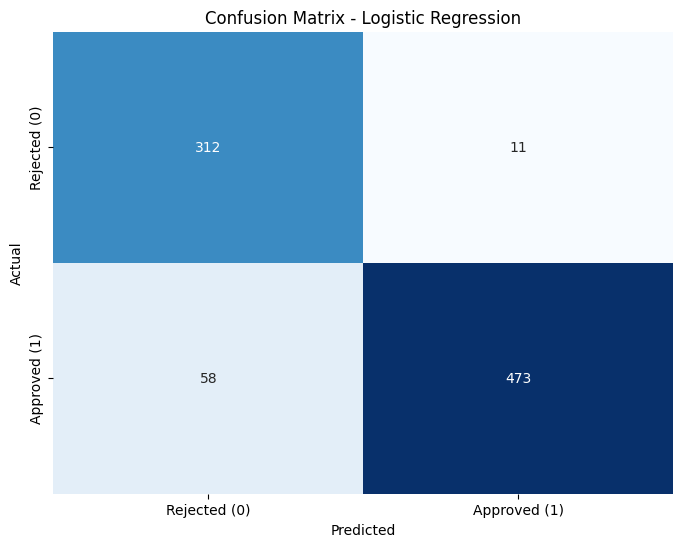

In [ ]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Rejected (0)', 'Approved (1)'], yticklabels=['Rejected (0)', 'Approved (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

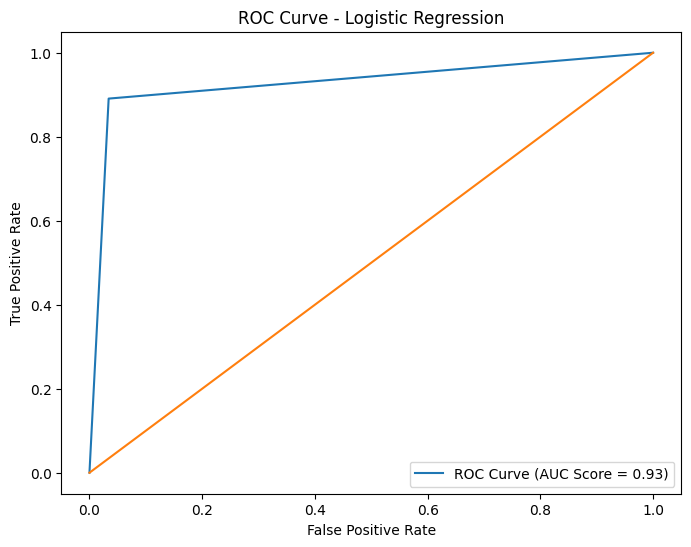

In [ ]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_custom)
auc_score = roc_auc_score(y_test, y_pred_custom)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC Score = {auc_score:.2f})')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Instantiate new model, conduct cross-validation to find best model, fit and evaluate new model adjusting threshold

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {'n_estimators': [100, 200], 'max_depth': [3, 4, 5], 'learning_rate': [0.5, 0.1], 'subsample': [0.8, 1.0], 'scale_pos_weight': [1, 2]}

search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=skf, random_state=42, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= 0.6).astype(int)

print('Accuracy:', accuracy_score(y_test, y_pred_thresh))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_thresh))
print('Classification Report:\n', classification_report(y_test, y_pred_thresh))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.9836065573770492
Confusion Matrix:
 [[316   7]
 [  7 524]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.99      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



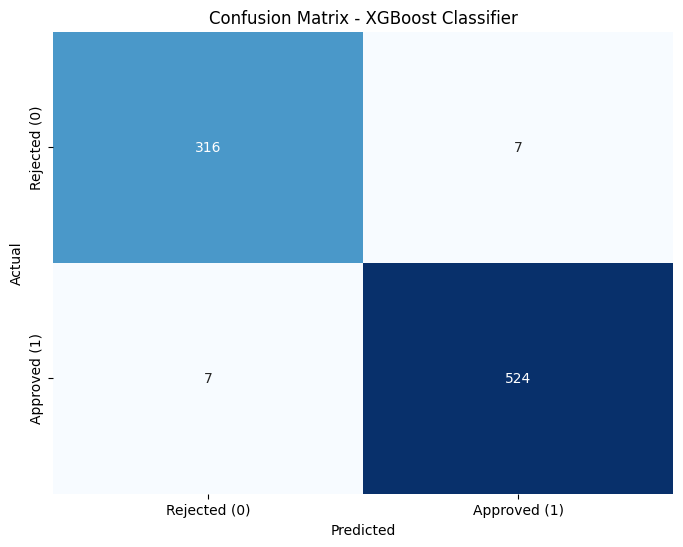

In [ ]:
# Plot confusion matrix

cm2 = confusion_matrix(y_test, y_pred_thresh)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Rejected (0)', 'Approved (1)'], yticklabels=['Rejected (0)', 'Approved (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

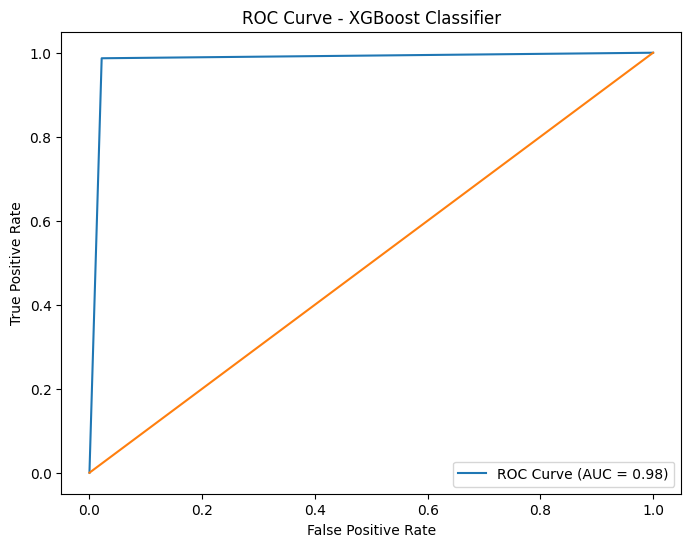

In [ ]:
# Plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_thresh)
auc_score = roc_auc_score(y_test, y_pred_thresh)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()